<a href="https://colab.research.google.com/github/rayeeed/UFP_Project/blob/main/POI_RFE_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
#from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score,cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectFromModel
from time import time
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.preprocessing import Normalizer,MinMaxScaler,StandardScaler 
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE

In [ ]:
# Load the data
df = pd.read_excel('/content/drive/MyDrive/datasets_Rayeed_GSV_POI_LU/model_49.xlsx', index_col='site_name')
df.drop(['Site_type','Latitude','Longitude','OID_','land_Ar_A_50','land_Ar_A_100','land_Ar_A_150','land_Ar_A_250',
         'land_Ar_A_500','land_Ar_A_750','land_Ar_A_1000','land_Ar_A_1250','land_Ar_A_1500','land_Ar_A_2000','land_Ar_A_3000','land_Ar_A_5000','land_Ar_p_500','land_Ar_p_100',
         'land_Ar_p_150','land_Ar_p_250','land_Ar_p_750','land_Ar_p_1000','land_Ar_p_1250','land_Ar_p_1500'],inplace=True, axis=1)


In [ ]:
df.shape

(49, 534)

In [ ]:
cols_to_drop = [col for col in df.columns if col.endswith('_50') or col.endswith('_p50') or col.endswith('_p2000') or col.endswith('_2000') or col.endswith('_3000') or col.endswith('_p3000') or col.endswith('_5000') or col.endswith('_p5000') ]
df_filtered1 = df.drop(cols_to_drop, axis=1)

In [ ]:
df_filtered1.shape

(49, 358)

In [ ]:
cols_to_drop = [col for col in df_filtered1.columns if '_' in col and col.split('_')[0] in ['gsv']]

df_filtered2 = df_filtered1.drop(cols_to_drop, axis=1)

In [ ]:
df_filtered2.shape

(49, 142)

In [ ]:
cols_to_drop = [col for col in df_filtered2.columns if '_' in col and col.split('_')[-2] in ['A']]
df_filtered3 = df_filtered2.drop(cols_to_drop, axis=1)

In [ ]:
df_filtered3.shape

(49, 118)

In [ ]:
y = df_filtered3.PNC
X = df_filtered3.drop(['PNC'], axis=1)

# Scale the features
trans = StandardScaler()
X_st = trans.fit_transform(X)
X_st = pd.DataFrame(X_st, columns=X.columns, index=X.index)

In [ ]:
!pip install optuna
import optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 6.7 MB/s eta 0:00:00


In [ ]:
!pip install git+https://github.com/nsh87/regressors.git@3a39e6aeb09953ccaeabec346f2eef324b7fcab9
from regressors import stats  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/nsh87/regressors.git (to revision 3a39e6aeb09953ccaeabec346f2eef324b7fcab9) to /tmp/pip-req-build-21dnowis
  Running command git clone --filter=blob:none --quiet https://github.com/nsh87/regressors.git /tmp/pip-req-build-21dnowis
  Running command git rev-parse -q --verify 'sha^3a39e6aeb09953ccaeabec346f2eef324b7fcab9'
  Running command git fetch -q https://github.com/nsh87/regressors.git 3a39e6aeb09953ccaeabec346f2eef324b7fcab9
  Running command git checkout -q 3a39e6aeb09953ccaeabec346f2eef324b7fcab9
  Resolved https://github.com/nsh87/regressors.git to commit 3a39e6aeb09953ccaeabec346f2eef324b7fcab9
  Preparing metadata (setup.py) ... done
  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12382 sha256=48278709a385a80277a9548202bf306449a5b20920b139dc11aabb696a174788
  Stored in directory: /root/.cache/pip/wheels/29/e0/70/0de

In [ ]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=9e79bf0ca539766dcbc6430202f8a20c3e1d594fca187eda4ef249db65d2d0fc
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


In [ ]:
X_Pred = pd.read_excel('/content/drive/MyDrive/datasets_Rayeed_GSV_POI_LU/combined_total_v3.0.xlsx', index_col='OID_')
col=X.columns
X_Pred_f1 = X_Pred[col]
X_Pred_f2= X_Pred_f1
x_pred_st= trans.transform(X_Pred_f2)
x_pred_st = pd.DataFrame(x_pred_st, columns = X_Pred_f2.columns,index=X_Pred_f2.index)

# **LR**

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,12):
  lst1=[]  
  LR = LinearRegression()
  feature_names = np.array(X_st.columns)

  #cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
  selector = RFE(LR, n_features_to_select=x)
  selector.fit(X_st, y)
  print(f"selected features: {x}")
  selected_features = X_st.columns[selector.support_]

  for i in selected_features:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()  
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

selected features: 2
selected features: 3
selected features: 4
selected features: 5
selected features: 6
selected features: 7
selected features: 8
selected features: 9
selected features: 10
selected features: 11
Done in 2.116s


In [ ]:
lst2

[['RdclS_750', 'RdL4_150'],
 ['RdclS_750', 'RdclS_1250', 'RdL4_150'],
 ['RdclS_750', 'RdclS_1250', 'RdL3_1250', 'RdL4_150'],
 ['RdclS_750', 'RdclS_1250', 'RdL3_1250', 'RdL4_150', 'distPrim'],
 ['RdclS_750', 'RdclS_1250', 'RdL2_250', 'RdL3_1250', 'RdL4_150', 'distPrim'],
 ['RdclS_750',
  'RdclS_1250',
  'RdL2_1250',
  'RdL2_250',
  'RdL3_1250',
  'RdL4_150',
  'distPrim'],
 ['RdclS_750',
  'RdclS_1250',
  'RdL1_1500',
  'RdL2_1250',
  'RdL2_250',
  'RdL3_1250',
  'RdL4_150',
  'distPrim'],
 ['RdclS_750',
  'RdclS_1250',
  'RdL1_1500',
  'RdL2_1250',
  'RdL2_250',
  'RdL3_1250',
  'RdL4_150',
  'pop_1000',
  'distPrim'],
 ['RdclS_750',
  'RdclS_1250',
  'RdL1_1500',
  'RdL1_750',
  'RdL2_1250',
  'RdL2_250',
  'RdL3_1250',
  'RdL4_150',
  'pop_1000',
  'distPrim'],
 ['RdclS_750',
  'RdclS_1250',
  'RdL1_150',
  'RdL1_1500',
  'RdL1_750',
  'RdL2_1250',
  'RdL2_250',
  'RdL3_1250',
  'RdL4_150',
  'pop_1000',
  'distPrim']]

r2 score for train data in LR: 0.30347659198829324
cross validation r2 score:
0.0841808829226347
r2 score for train data in LR: 0.32630024183636264
cross validation r2 score:
0.07921298644994024
r2 score for train data in LR: 0.3643538729089959
cross validation r2 score:
0.15397261643970128
r2 score for train data in LR: 0.4368828763761844
cross validation r2 score:
0.17066550125284918
r2 score for train data in LR: 0.48345837601051955
cross validation r2 score:
0.21526329402211597
r2 score for train data in LR: 0.49857442338344327
cross validation r2 score:
0.20180710710214156
r2 score for train data in LR: 0.575692113640176
cross validation r2 score:
0.23339859142200614
r2 score for train data in LR: 0.6376147224512939
cross validation r2 score:
0.262382118775604
r2 score for train data in LR: 0.6527011733773862
cross validation r2 score:
0.2677353378858869
r2 score for train data in LR: 0.7175108611321894
cross validation r2 score:
0.46161863285330595


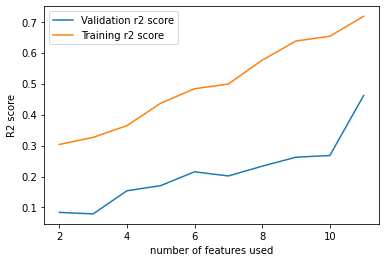

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=LinearRegression()
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')
  
  predicted= cross_val_predict(model, X_Train, y, cv=10)
  
  scores = r2_score(y, predicted)
                              

  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error') 
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

selected features: 2
selected features: 3
selected features: 4
selected features: 5
selected features: 6
selected features: 7
selected features: 8
selected features: 9
selected features: 10
Done in 114.793s
r2 score for train data in LR: 0.27830939195473803
cross validation r2 score:
0.15948001966579395
r2 score for train data in LR: 0.3164026563506386
cross validation r2 score:
0.2009300813498649
r2 score for train data in LR: 0.35171727770963435
cross validation r2 score:
0.20046538116667556
r2 score for train data in LR: 0.35851207744011493
cross validation r2 score:
0.19251566011074028
r2 score for train data in LR: 0.36209203454696093
cross validation r2 score:
0.19203394882319236
r2 score for train data in LR: 0.3793966150365111
cross validation r2 score:
0.1904150049176987
r2 score for train data in LR: 0.38790854247251705
cross validation r2 score:
0.1632694112199209
r2 score for train data in LR: 0.4224151089565765
cross validation r2 score:
0.16962393030329526
r2 score for tr

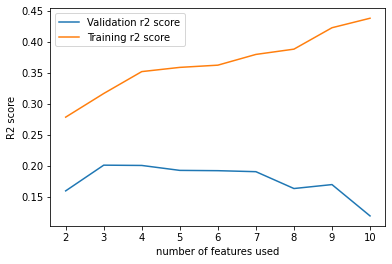

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,11):
  lst1=[]  
  LR = LinearRegression().fit(X_st, y)
  importance = np.abs(LR.coef_)
  feature_names = np.array(X_st.columns)
  #cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
  sfs_forward = SequentialFeatureSelector(
  LR, n_features_to_select=x, direction="forward",cv=10 ).fit(X_st, y)
  print(f"selected features: {x}")
  # tic_bwd = time()
  # sfs_backward = SequentialFeatureSelector(
  #     LR, n_features_to_select=3, direction="backward"
  # ).fit(X, y)
  # toc_bwd = time()

  
  for i in feature_names[sfs_forward.get_support()]:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()  
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=LinearRegression()
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')
  
  predicted= cross_val_predict(model, X_Train, y, cv=10)
  
  scores = r2_score(y, predicted)
                              

  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error') 
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
lst2

[['RdAll_150', 'RdL4_100'],
 ['RdAll_150', 'RdL1_150', 'RdL4_100'],
 ['land_Ar_UF_p_100', 'RdAll_150', 'RdL1_150', 'RdL4_100'],
 ['land_Ar_UF_p_100', 'land_Ar_UF_p_150', 'RdAll_150', 'RdL1_150', 'RdL4_100'],
 ['land_Ar_UF_p_100',
  'land_Ar_UF_p_150',
  'RdAll_150',
  'RdL1_150',
  'RdL4_100',
  'rest_s250'],
 ['land_Ar_UF_p_100',
  'land_Ar_UF_p_150',
  'RdAll_150',
  'RdclP_500',
  'RdL1_150',
  'RdL4_100',
  'rest_s250'],
 ['land_Ar_UF_p_100',
  'land_Ar_UF_p_150',
  'land_Ar_IC_p_1500',
  'RdAll_150',
  'RdclP_500',
  'RdL1_150',
  'RdL4_100',
  'rest_s250'],
 ['land_Ar_UF_p_100',
  'land_Ar_UF_p_150',
  'land_Ar_IC_p_1500',
  'RdAll_150',
  'RdclP_500',
  'RdclS_750',
  'RdL1_150',
  'RdL4_100',
  'rest_s250'],
 ['land_Ar_UF_p_100',
  'land_Ar_UF_p_150',
  'land_Ar_IC_p_1500',
  'land_Ar_UF_p_1500',
  'RdAll_150',
  'RdclP_500',
  'RdclS_750',
  'RdL1_150',
  'RdL4_100',
  'rest_s250']]

RdAll_150   -1.375870
RdL1_150    -0.299064
RdL4_100    -0.321104
dtype: float64
RdAll_150    3.148922
RdL1_150     5.421630
RdL4_100     4.281993
dtype: float64
r2 score for train data in LR: 0.3164026563506386
cross validation r2 score: 0.2009300813498649
Minimum prediction value: 38710.240302588965
Corresponding row: prediction    38710.240303
Latitude         23.688385
Longitude        90.436188
Name: 1268, dtype: float64
Minimum prediction value: 115552.01574855215
Corresponding row: prediction    115552.015749
Latitude          23.823608
Longitude         90.419891
Name: 8159, dtype: float64
0


Weight,Feature
0.2656 ± 0.0641,RdL4_100
0.0620 ± 0.0699,RdL1_150
0.0523 ± 0.0899,RdAll_150


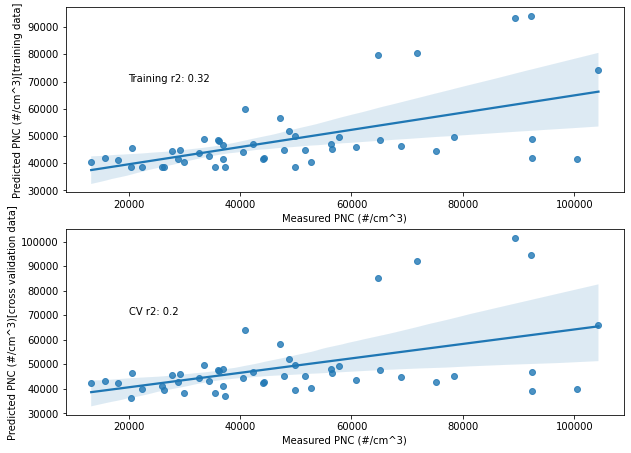

In [ ]:
lst1 = ['RdAll_150', 'RdL1_150', 'RdL4_100']
df_relevant = X_st[lst1]
x_pred_relevant = x_pred_st[lst1] 

# For each feature, find the minimum and maximum values in the Df dataset
feature_min = df_relevant.min()
feature_max = df_relevant.max()
print(feature_min)
print(feature_max)

# Initialize a list to store the indices of rows to keep
rows_to_keep = []

# Iterate over each row in the X_Pred dataset
for i, row in x_pred_relevant.iterrows():
    # Initialize a flag to check if this row should be kept
    keep_row = True
    
    # Iterate over each feature in the row
    for feature in lst1:
        # Check if the value for this feature falls outside the range of values in the Df dataset
        if row[feature] < feature_min[feature] or row[feature] > feature_max[feature]:
            # If it does, mark this row as one to skip
            keep_row = False
            break
    
    # If the row passed the checks, append its index to the list of rows to keep
    if keep_row:
        rows_to_keep.append(i)

# Use the list of indices to select only the rows that should be kept
x_pred_filtered = x_pred_relevant.loc[rows_to_keep]



model = LinearRegression() 

X_train= X_st[lst1]

model.fit(X_train,y)
pred_train=model.predict(X_train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_train, y,
                              cv=10)  
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)
new= pd.DataFrame()
new["actual"]=y
new["predicted"]= predicted
new

txt1 = "Training r2: " + str(round(r2_per,2))
txt2 = "CV r2: " + str(round(scores,2))

fig, axs = plt.subplots(2,1, figsize=(10, 7.5))

axs[0]=sns.regplot(ax=axs[0],x=y, y=pred_train)
axs[0].set_xlabel("Measured PNC (#/cm^3)")
axs[0].set_ylabel("Predicted PNC (#/cm^3)[training data]")
axs[0].text(20000, 70000,  txt1)

axs[1]=sns.regplot(ax=axs[1], x=y, y=predicted)
axs[1].set_xlabel("Measured PNC (#/cm^3)")
axs[1].set_ylabel("Predicted PNC (#/cm^3)[cross validation data]")
axs[1].text(20000, 70000,  txt2)


x_pred_new = x_pred_filtered
pred_train=model.predict(x_pred_new)
pred = pd.DataFrame(index=x_pred_new.index)
pred['prediction'] = pred_train
pred['Latitude'] = X_Pred.loc[pred.index, 'Latitude'].values
pred['Longitude'] = X_Pred.loc[pred.index, 'Longitude'].values
pred.to_csv('/content/Linear_poi.csv')

min_prediction_index = pred['prediction'].idxmin()
min_prediction_row = pred.loc[min_prediction_index]

print("Minimum prediction value:", min_prediction_row['prediction'])
print("Corresponding row:", min_prediction_row)

max_prediction_index = pred['prediction'].idxmax()
max_prediction_row = pred.loc[max_prediction_index]

print("Minimum prediction value:", max_prediction_row['prediction'])
print("Corresponding row:", max_prediction_row)

num_negatives = (pred['prediction'] <0).sum()

print(num_negatives)

perm = PermutationImportance(model).fit(X_train, y)
eli5.show_weights(perm, feature_names=X_train.columns.tolist())

# **Ridge**

selected features: 2
selected features: 3
selected features: 4
selected features: 5
selected features: 6
selected features: 7
selected features: 8
selected features: 9
selected features: 10
Done in 6.620s
r2 score for train data in LR: 0.33843246906590463
cross validation r2 score:
0.25806045709924696
r2 score for train data in LR: 0.374349249788111
cross validation r2 score:
0.24451444693153357
r2 score for train data in LR: 0.4025027978898369
cross validation r2 score:
0.25022797800730345
r2 score for train data in LR: 0.484079977640681
cross validation r2 score:
0.31917477416775686
r2 score for train data in LR: 0.5648539136519108
cross validation r2 score:
0.3631627044455372
r2 score for train data in LR: 0.6198207274746472
cross validation r2 score:
0.36338379696970946
r2 score for train data in LR: 0.6686602429800761
cross validation r2 score:
0.4296142922472179
r2 score for train data in LR: 0.6940114918810258
cross validation r2 score:
0.47654174380067216
r2 score for train dat

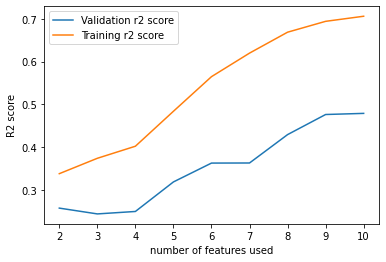

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,11):
  lst1=[]  
  LR = RidgeCV(alphas=np.logspace(0, 10, num=10)).fit(X_st, y)
  feature_names = np.array(X_st.columns)

  #cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
  selector = RFE(LR, n_features_to_select=x)
  selector.fit(X_st, y)
  print(f"selected features: {x}")
  selected_features = X_st.columns[selector.support_]

  for i in selected_features:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()  
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=LR
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')
  
  predicted= cross_val_predict(model, X_Train, y, cv=10)
  
  scores = r2_score(y, predicted)
                              

  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error') 
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
lst2

[['RdL2_100', 'RdL4_150'],
 ['RdL1_1500', 'RdL2_100', 'RdL4_150'],
 ['RdL1_1500', 'RdL2_100', 'RdL4_150', 'rest_s1000'],
 ['land_Ar_UF_p_100', 'RdL1_1500', 'RdL2_100', 'RdL4_150', 'rest_s1000'],
 ['land_Ar_UF_p_100',
  'RdL1_1500',
  'RdL2_100',
  'RdL3_750',
  'RdL4_150',
  'rest_s1000'],
 ['land_Ar_UF_p_100',
  'RdL1_1500',
  'RdL2_100',
  'RdL3_750',
  'RdL4_150',
  'rest_s1000',
  'distPrim'],
 ['land_Ar_UF_p_100',
  'RdL1_1500',
  'RdL2_100',
  'RdL2_1500',
  'RdL3_750',
  'RdL4_150',
  'rest_s1000',
  'distPrim'],
 ['land_Ar_UF_p_100',
  'RdclS_750',
  'RdL1_1500',
  'RdL2_100',
  'RdL2_1500',
  'RdL3_750',
  'RdL4_150',
  'rest_s1000',
  'distPrim'],
 ['land_Ar_UF_p_100',
  'RdclS_750',
  'RdL1_1500',
  'RdL2_100',
  'RdL2_1500',
  'RdL3_750',
  'RdL4_150',
  'rest_s500',
  'rest_s1000',
  'distPrim']]

RdL2_100   -0.673532
RdL4_150   -0.408242
dtype: float64
RdL2_100    3.118587
RdL4_150    3.706507
dtype: float64
r2 score for train data in LR: 0.33843246906590463
cross validation r2 score: 0.25806045709924696
Minimum prediction value: 41356.71932472282
Corresponding row: prediction    41356.719325
Latitude         23.688385
Longitude        90.436188
Name: 1268, dtype: float64
Minimum prediction value: 90480.35433689074
Corresponding row: prediction    90480.354337
Latitude         23.751404
Longitude        90.378387
Name: 4456, dtype: float64
0


Weight,Feature
0.5617 ± 0.2006,RdL4_150
0.1360 ± 0.0554,RdL2_100


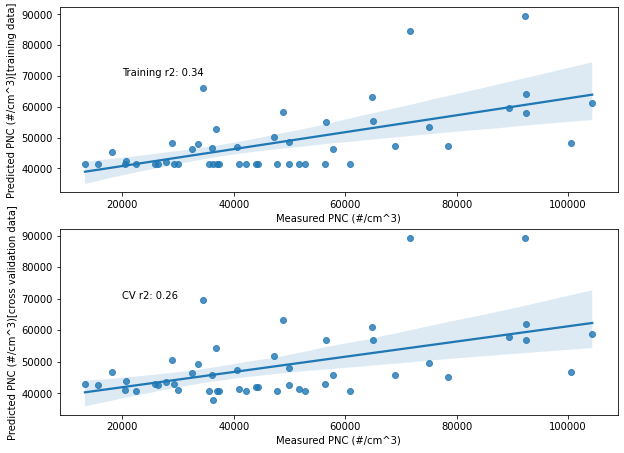

In [ ]:
lst1 = ['RdL2_100', 'RdL4_150']
df_relevant = X_st[lst1]
x_pred_relevant = x_pred_st[lst1] 

# For each feature, find the minimum and maximum values in the Df dataset
feature_min = df_relevant.min()
feature_max = df_relevant.max()
print(feature_min)
print(feature_max)

# Initialize a list to store the indices of rows to keep
rows_to_keep = []

# Iterate over each row in the X_Pred dataset
for i, row in x_pred_relevant.iterrows():
    # Initialize a flag to check if this row should be kept
    keep_row = True
    
    # Iterate over each feature in the row
    for feature in lst1:
        # Check if the value for this feature falls outside the range of values in the Df dataset
        if row[feature] < feature_min[feature] or row[feature] > feature_max[feature]:
            # If it does, mark this row as one to skip
            keep_row = False
            break
    
    # If the row passed the checks, append its index to the list of rows to keep
    if keep_row:
        rows_to_keep.append(i)

# Use the list of indices to select only the rows that should be kept
x_pred_filtered = x_pred_relevant.loc[rows_to_keep]



model = RidgeCV(alphas=np.logspace(0, 10, num=10))

X_train= X_st[lst1]

model.fit(X_train,y)
pred_train=model.predict(X_train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_train, y,
                              cv=10)  
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)
new= pd.DataFrame()
new["actual"]=y
new["predicted"]= predicted
new

txt1 = "Training r2: " + str(round(r2_per,2))
txt2 = "CV r2: " + str(round(scores,2))

fig, axs = plt.subplots(2,1, figsize=(10, 7.5))

axs[0]=sns.regplot(ax=axs[0],x=y, y=pred_train)
axs[0].set_xlabel("Measured PNC (#/cm^3)")
axs[0].set_ylabel("Predicted PNC (#/cm^3)[training data]")
axs[0].text(20000, 70000,  txt1)

axs[1]=sns.regplot(ax=axs[1], x=y, y=predicted)
axs[1].set_xlabel("Measured PNC (#/cm^3)")
axs[1].set_ylabel("Predicted PNC (#/cm^3)[cross validation data]")
axs[1].text(20000, 70000,  txt2)


x_pred_new = x_pred_filtered
pred_train=model.predict(x_pred_new)
pred = pd.DataFrame(index=x_pred_new.index)
pred['prediction'] = pred_train
pred['Latitude'] = X_Pred.loc[pred.index, 'Latitude'].values
pred['Longitude'] = X_Pred.loc[pred.index, 'Longitude'].values
pred.to_csv('/content/Ridge_poi.csv')

min_prediction_index = pred['prediction'].idxmin()
min_prediction_row = pred.loc[min_prediction_index]

print("Minimum prediction value:", min_prediction_row['prediction'])
print("Corresponding row:", min_prediction_row)

max_prediction_index = pred['prediction'].idxmax()
max_prediction_row = pred.loc[max_prediction_index]

print("Minimum prediction value:", max_prediction_row['prediction'])
print("Corresponding row:", max_prediction_row)

num_negatives = (pred['prediction'] <0).sum()

print(num_negatives)

perm = PermutationImportance(model).fit(X_train, y)
eli5.show_weights(perm, feature_names=X_train.columns.tolist())

selected features: 2
selected features: 3
selected features: 4
selected features: 5
selected features: 6
selected features: 7
selected features: 8
selected features: 9
selected features: 10
Done in 145.695s
r2 score for train data in LR: 0.26981762669271936
cross validation r2 score:
0.18860403703980788
r2 score for train data in LR: 0.31020520961024645
cross validation r2 score:
0.22455134222041295
r2 score for train data in LR: 0.34253481870157043
cross validation r2 score:
0.23230941901154334
r2 score for train data in LR: 0.3474073605830419
cross validation r2 score:
0.2356134692927846
r2 score for train data in LR: 0.3600270955599344
cross validation r2 score:
0.24164812370861455
r2 score for train data in LR: 0.4206729756510371
cross validation r2 score:
0.303361474802347
r2 score for train data in LR: 0.42820488740484675
cross validation r2 score:
0.29070926747942727
r2 score for train data in LR: 0.45463071285109347
cross validation r2 score:
0.290767367979071
r2 score for trai

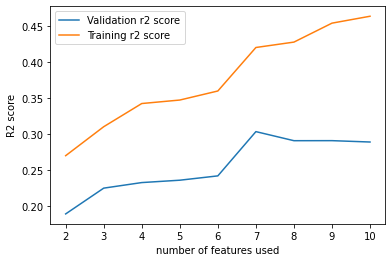

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,11):
  lst1=[]  
  LR = RidgeCV(alphas=np.logspace(0, 10, num=10)).fit(X_st, y)
  importance = np.abs(LR.coef_)
  feature_names = np.array(X_st.columns)
  #cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
  sfs_forward = SequentialFeatureSelector(
  LR, n_features_to_select=x, direction="forward",cv=10 ).fit(X_st, y)
  print(f"selected features: {x}")
  # tic_bwd = time()
  # sfs_backward = SequentialFeatureSelector(
  #     LR, n_features_to_select=3, direction="backward"
  # ).fit(X, y)
  # toc_bwd = time()

  
  for i in feature_names[sfs_forward.get_support()]:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()  
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=LR
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')
  
  predicted= cross_val_predict(model, X_Train, y, cv=10)
  
  scores = r2_score(y, predicted)
                              

  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error') 
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
lst2

[['RdAll_150', 'RdL4_100'],
 ['RdAll_150', 'RdL1_150', 'RdL4_100'],
 ['land_Ar_UF_p_100', 'RdAll_150', 'RdL1_150', 'RdL4_100'],
 ['land_Ar_UF_p_100', 'RdAll_150', 'RdL1_150', 'RdL4_100', 'rest_s250'],
 ['land_Ar_UF_p_100',
  'RdAll_150',
  'RdclP_500',
  'RdL1_150',
  'RdL4_100',
  'rest_s250'],
 ['land_Ar_UF_p_100',
  'RdAll_150',
  'RdclP_500',
  'RdL1_150',
  'RdL2_100',
  'RdL4_100',
  'rest_s250'],
 ['land_Ar_UF_p_100',
  'RdAll_150',
  'RdclP_500',
  'RdL1_150',
  'RdL2_100',
  'RdL3_500',
  'RdL4_100',
  'rest_s250'],
 ['land_Ar_UF_p_100',
  'RdAll_150',
  'RdclP_500',
  'RdL1_150',
  'RdL2_100',
  'RdL3_500',
  'RdL4_100',
  'rest_s250',
  'rest_s500'],
 ['land_Ar_UF_p_100',
  'RdAll_150',
  'RdclP_500',
  'RdL1_100',
  'RdL1_150',
  'RdL2_100',
  'RdL3_500',
  'RdL4_100',
  'rest_s250',
  'rest_s500']]

In [ ]:
X_train = lst2[3]
X_train

['land_Ar_p_1500', 'RdclS_2000', 'RdL2_2000', 'RdL4_150', 'pop_750']

In [ ]:
X_train= X_st[lst2[5]] 
def objective(trial):
    alpha = trial.suggest_float("alpha", -7, 10)
    intercept = trial.suggest_categorical("fit_intercept", [True, False])
    tol = trial.suggest_float("tol", 0.001, 0.1, log=True)
    solver = trial.suggest_categorical("solver", ["auto", "svd","cholesky", "lsqr", "saga", "sag"])

    ## Create Model
    regressor = Ridge(alpha=alpha,fit_intercept=intercept,tol=tol,solver=solver)
    
    predicted= cross_val_predict(regressor, X_train, y,
                            cv=LeaveOneOut())
    return r2_score(y, predicted)

In [ ]:
study = optuna.create_study(study_name="RidgeRegression",direction='maximize')
study.optimize(objective, n_trials=500)

Streaming output truncated to the last 5000 lines.
  sqrt_alpha = np.sqrt(alpha)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:132: RuntimeWarning: invalid value encountered in sqrt
  sqrt_alpha = np.sqrt(alpha)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:132: RuntimeWarning: invalid value encountered in sqrt
  sqrt_alpha = np.sqrt(alpha)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:132: RuntimeWarning: invalid value encountered in sqrt
  sqrt_alpha = np.sqrt(alpha)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:132: RuntimeWarning: invalid value encountered in sqrt
  sqrt_alpha = np.sqrt(alpha)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:132: RuntimeWarning: invalid value encountered in sqrt
  sqrt_alpha = np.sqrt(alpha)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:132: RuntimeWarning: invalid value encountered in sqrt
  sqrt_alpha = np.s

KeyboardInterrupt: ignored

In [ ]:
print("Best Params : {}".format(study.best_params))

print("\nBest r2 : {}".format(study.best_value))

best_trial = study.best_trial
best_params = best_trial.params
model = Ridge(alpha=best_params['alpha'],
              fit_intercept=best_params['fit_intercept'],
              tol=best_params['tol'],
              solver= best_params['solver'])
model.fit(X_train,y)
pred_train=model.predict(X_train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_train, y,
                              cv=10)  
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)
pred

Best Params : {'alpha': -2.995112594776683, 'fit_intercept': True, 'tol': 0.07147388945956004, 'solver': 'saga'}

Best r2 : 0.6972561925413503
r2 score for train data in LR: 0.7660439500456881
cross validation r2 score: 0.6522040795975885


,actual,predicted
site_name,,
Agashadek_road,44382.44336,25068.088873
Lalbag,44037.05208,49131.310393
Gulisthan,48823.68550,28883.625176
Polashi,28827.01283,37247.768179
BUET,18134.49600,18198.361381
Azimpur,35577.14779,52591.090373
"Z Hq Hall, DU",52691.26221,40403.260579
New_market,42245.24506,64779.379570
Bolaka Cinema Hall,57820.44803,61387.749095


# **Lasso**

selected features: 2
selected features: 3
selected features: 4
selected features: 5
selected features: 6
selected features: 7
selected features: 8
selected features: 9
selected features: 10
Done in 10.111s
r2 score for train data in LR: 0.3405639950888658
cross validation r2 score:
0.18927209703136982
r2 score for train data in LR: 0.35798747016219457
cross validation r2 score:
0.20879839471789674
r2 score for train data in LR: 0.39376400581726734
cross validation r2 score:
0.23117309037142642
r2 score for train data in LR: 0.40436422096425506
cross validation r2 score:
0.19089912354183047
r2 score for train data in LR: 0.43997875802184105
cross validation r2 score:
0.20108093552607909
r2 score for train data in LR: 0.5278644662505607
cross validation r2 score:
0.3260127478797826
r2 score for train data in LR: 0.6268003214758522
cross validation r2 score:
0.44626009465965755
r2 score for train data in LR: 0.6476641923623425
cross validation r2 score:
0.4011841499828289
r2 score for tra

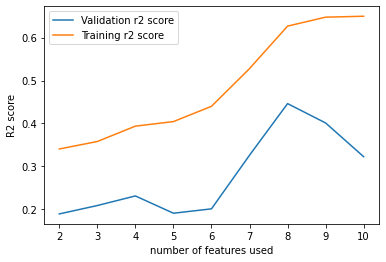

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,11):
  lst1=[]  
  LR = Lasso(max_iter=100000, alpha=0.1)
  feature_names = np.array(X_st.columns)

  #cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
  selector = RFE(LR, n_features_to_select=x)
  selector.fit(X_st, y)
  print(f"selected features: {x}")
  selected_features = X_st.columns[selector.support_]

  for i in selected_features:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()  
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=Lasso(max_iter=100000, alpha=0.1)
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')
  
  predicted= cross_val_predict(model, X_Train, y,
                              cv=10)
  
  scores = r2_score(y, predicted)
                              

  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error') 
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
lst2

[['RdL3_1000', 'RdL4_150'],
 ['RdL3_1000', 'RdL4_150', 'rest_s500'],
 ['RdL3_1000', 'RdL4_150', 'rest_s250', 'rest_s500'],
 ['RdL2_1500', 'RdL3_1000', 'RdL4_150', 'rest_s250', 'rest_s500'],
 ['RdclS_750', 'RdL2_1500', 'RdL3_1000', 'RdL4_150', 'rest_s250', 'rest_s500'],
 ['RdclS_750',
  'RdL2_1500',
  'RdL3_1000',
  'RdL4_150',
  'rest_s250',
  'rest_s500',
  'build_100'],
 ['RdclS_750',
  'RdL1_1250',
  'RdL2_1500',
  'RdL3_1000',
  'RdL4_150',
  'rest_s250',
  'rest_s500',
  'build_100'],
 ['RdclS_750',
  'RdL1_1250',
  'RdL2_1500',
  'RdL3_1000',
  'RdL3_150',
  'RdL4_150',
  'rest_s250',
  'rest_s500',
  'build_100'],
 ['RdclS_100',
  'RdclS_750',
  'RdL1_1250',
  'RdL2_1500',
  'RdL3_1000',
  'RdL3_150',
  'RdL4_150',
  'rest_s250',
  'rest_s500',
  'build_100']]

RdclS_750   -1.215529
RdL2_1500   -1.603610
RdL3_1000   -0.901571
RdL4_150    -0.408242
rest_s250   -0.795761
rest_s500   -1.191292
build_100   -1.222524
dtype: float64
RdclS_750    4.069383
RdL2_1500    2.353429
RdL3_1000    2.911925
RdL4_150     3.706507
rest_s250    3.610904
rest_s500    2.822724
build_100    3.759322
dtype: float64
r2 score for train data in LR: 0.5278644662505607
cross validation r2 score: 0.3260127478797826
Minimum prediction value: -21081.400079463347
Corresponding row: prediction   -21081.400079
Latitude         23.873993
Longitude        90.387390
Name: 10717, dtype: float64
Minimum prediction value: 130489.82059225487
Corresponding row: prediction    130489.820592
Latitude          23.771393
Longitude         90.389191
Name: 5474, dtype: float64
26


Weight,Feature
1.5795 ± 0.5191,rest_s500
1.0158 ± 0.2694,RdL4_150
0.6747 ± 0.2820,rest_s250
0.5527 ± 0.3115,RdL3_1000
0.4046 ± 0.2674,RdclS_750
0.2972 ± 0.0935,RdL2_1500
0.2096 ± 0.0992,build_100


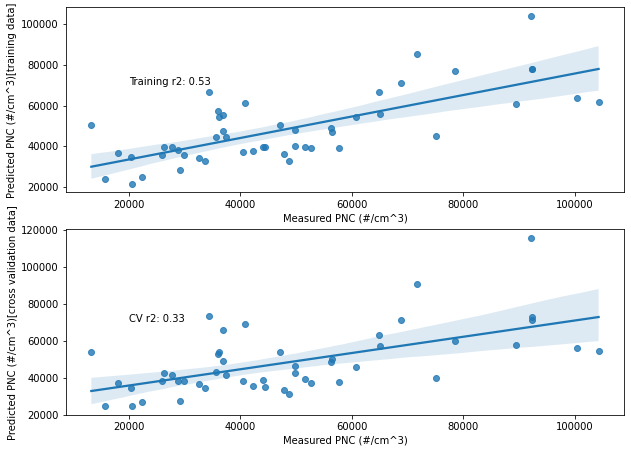

In [ ]:
lst1 = ['RdclS_750',
  'RdL2_1500',
  'RdL3_1000',
  'RdL4_150',
  'rest_s250',
  'rest_s500',
  'build_100']
df_relevant = X_st[lst1]
x_pred_relevant = x_pred_st[lst1] 

# For each feature, find the minimum and maximum values in the Df dataset
feature_min = df_relevant.min()
feature_max = df_relevant.max()
print(feature_min)
print(feature_max)

# Initialize a list to store the indices of rows to keep
rows_to_keep = []

# Iterate over each row in the X_Pred dataset
for i, row in x_pred_relevant.iterrows():
    # Initialize a flag to check if this row should be kept
    keep_row = True
    
    # Iterate over each feature in the row
    for feature in lst1:
        # Check if the value for this feature falls outside the range of values in the Df dataset
        if row[feature] < feature_min[feature] or row[feature] > feature_max[feature]:
            # If it does, mark this row as one to skip
            keep_row = False
            break
    
    # If the row passed the checks, append its index to the list of rows to keep
    if keep_row:
        rows_to_keep.append(i)

# Use the list of indices to select only the rows that should be kept
x_pred_filtered = x_pred_relevant.loc[rows_to_keep]



model = Lasso(max_iter=100000, alpha=0.1)

X_train= X_st[lst1]

model.fit(X_train,y)
pred_train=model.predict(X_train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_train, y,
                              cv=10)  
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)
new= pd.DataFrame()
new["actual"]=y
new["predicted"]= predicted
new

txt1 = "Training r2: " + str(round(r2_per,2))
txt2 = "CV r2: " + str(round(scores,2))

fig, axs = plt.subplots(2,1, figsize=(10, 7.5))

axs[0]=sns.regplot(ax=axs[0],x=y, y=pred_train)
axs[0].set_xlabel("Measured PNC (#/cm^3)")
axs[0].set_ylabel("Predicted PNC (#/cm^3)[training data]")
axs[0].text(20000, 70000,  txt1)

axs[1]=sns.regplot(ax=axs[1], x=y, y=predicted)
axs[1].set_xlabel("Measured PNC (#/cm^3)")
axs[1].set_ylabel("Predicted PNC (#/cm^3)[cross validation data]")
axs[1].text(20000, 70000,  txt2)


x_pred_new = x_pred_filtered
pred_train=model.predict(x_pred_new)
pred = pd.DataFrame(index=x_pred_new.index)
pred['prediction'] = pred_train
pred['Latitude'] = X_Pred.loc[pred.index, 'Latitude'].values
pred['Longitude'] = X_Pred.loc[pred.index, 'Longitude'].values
pred.to_csv('/content/lasso_poi.csv')

min_prediction_index = pred['prediction'].idxmin()
min_prediction_row = pred.loc[min_prediction_index]

print("Minimum prediction value:", min_prediction_row['prediction'])
print("Corresponding row:", min_prediction_row)

max_prediction_index = pred['prediction'].idxmax()
max_prediction_row = pred.loc[max_prediction_index]

print("Minimum prediction value:", max_prediction_row['prediction'])
print("Corresponding row:", max_prediction_row)

num_negatives = (pred['prediction'] <0).sum()

print(num_negatives)

perm = PermutationImportance(model).fit(X_train, y)
eli5.show_weights(perm, feature_names=X_train.columns.tolist())

selected features: 2
selected features: 3
selected features: 4
selected features: 5
selected features: 6
selected features: 7
selected features: 8
selected features: 9
selected features: 10
Done in 108.347s
r2 score for train data in LR: 0.2783093919291927
cross validation r2 score:
0.15948168357631576
r2 score for train data in LR: 0.3164026563181491
cross validation r2 score:
0.2009317442431604
r2 score for train data in LR: 0.35171727764187855
cross validation r2 score:
0.20046778655196873
r2 score for train data in LR: 0.35851207578775934
cross validation r2 score:
0.19251844356836212
r2 score for train data in LR: 0.36209203288185254
cross validation r2 score:
0.19203654347458787
r2 score for train data in LR: 0.3793966132516349
cross validation r2 score:
0.1904175591022409
r2 score for train data in LR: 0.3879085406474496
cross validation r2 score:
0.163275068161573
r2 score for train data in LR: 0.4224151070140989
cross validation r2 score:
0.16962630054862804
r2 score for train

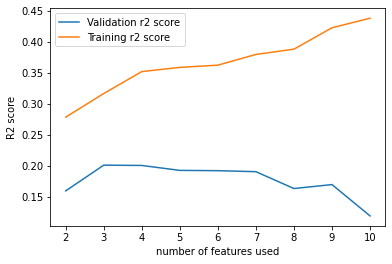

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,11):
  lst1=[]  
  LR = Lasso(max_iter=100000, alpha=0.1).fit(X_st, y)
  importance = np.abs(LR.coef_)
  feature_names = np.array(X_st.columns)
  #cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
  sfs_forward = SequentialFeatureSelector(
  LR, n_features_to_select=x, direction="forward",cv=10 ).fit(X_st, y)
  print(f"selected features: {x}")
  # tic_bwd = time()
  # sfs_backward = SequentialFeatureSelector(
  #     LR, n_features_to_select=3, direction="backward"
  # ).fit(X, y)
  # toc_bwd = time()

  
  for i in feature_names[sfs_forward.get_support()]:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()  
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=LR
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')
  
  predicted= cross_val_predict(model, X_Train, y, cv=10)
  
  scores = r2_score(y, predicted)
                              

  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error') 
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
lst2

[['RdAll_150', 'RdL4_100'],
 ['RdAll_150', 'RdL1_150', 'RdL4_100'],
 ['land_Ar_UF_p_100', 'RdAll_150', 'RdL1_150', 'RdL4_100'],
 ['land_Ar_UF_p_100', 'land_Ar_UF_p_150', 'RdAll_150', 'RdL1_150', 'RdL4_100'],
 ['land_Ar_UF_p_100',
  'land_Ar_UF_p_150',
  'RdAll_150',
  'RdL1_150',
  'RdL4_100',
  'rest_s250'],
 ['land_Ar_UF_p_100',
  'land_Ar_UF_p_150',
  'RdAll_150',
  'RdclP_500',
  'RdL1_150',
  'RdL4_100',
  'rest_s250'],
 ['land_Ar_UF_p_100',
  'land_Ar_UF_p_150',
  'land_Ar_IC_p_1500',
  'RdAll_150',
  'RdclP_500',
  'RdL1_150',
  'RdL4_100',
  'rest_s250'],
 ['land_Ar_UF_p_100',
  'land_Ar_UF_p_150',
  'land_Ar_IC_p_1500',
  'RdAll_150',
  'RdclP_500',
  'RdclS_750',
  'RdL1_150',
  'RdL4_100',
  'rest_s250'],
 ['land_Ar_UF_p_100',
  'land_Ar_UF_p_150',
  'land_Ar_IC_p_1500',
  'land_Ar_UF_p_1500',
  'RdAll_150',
  'RdclP_500',
  'RdclS_750',
  'RdL1_150',
  'RdL4_100',
  'rest_s250']]

In [ ]:
X_train= X_st[lst2[1]] 

def objective(trial):
    alpha = trial.suggest_float("alpha", .0001, 10)
    intercept = trial.suggest_categorical("fit_intercept", [True, False])
    selection = trial.suggest_categorical("selection", ["cyclic", "random"])

    ## Create Model
    regressor = Lasso(alpha=alpha, fit_intercept=intercept, selection=selection)

    predicted= cross_val_predict(regressor, X_train, y, cv=10)
    return r2_score(y, predicted)


In [ ]:
study = optuna.create_study(direction='maximize',study_name = "Lasso")
study.optimize(objective, n_trials=5000)

Streaming output truncated to the last 5000 lines.
[I 2023-03-25 05:10:03,824] Trial 0 finished with value: 0.20879282623743023 and parameters: {'alpha': 3.177522559817646, 'fit_intercept': True, 'selection': 'random'}. Best is trial 0 with value: 0.20879282623743023.
[I 2023-03-25 05:10:03,887] Trial 1 finished with value: 0.2087935633650243 and parameters: {'alpha': 4.54766430851276, 'fit_intercept': True, 'selection': 'random'}. Best is trial 1 with value: 0.2087935633650243.
[I 2023-03-25 05:10:03,967] Trial 2 finished with value: -4.766216889407936 and parameters: {'alpha': 9.236266613944261, 'fit_intercept': False, 'selection': 'cyclic'}. Best is trial 1 with value: 0.2087935633650243.
[I 2023-03-25 05:10:04,093] Trial 3 finished with value: -4.766426885223876 and parameters: {'alpha': 6.866380255529151, 'fit_intercept': False, 'selection': 'cyclic'}. Best is trial 1 with value: 0.2087935633650243.
[I 2023-03-25 05:10:04,209] Trial 4 finished with value: -4.7666818532891115 and p

In [ ]:
optuna.visualization.plot_slice(study)

selected features: 2
selected features: 3
selected features: 4
selected features: 5
selected features: 6
selected features: 7
selected features: 8
selected features: 9
selected features: 10
Done in 549.650s
r2 score for train data in LR: 0.2064404013356852
cross validation r2 score:
0.09082425919857884
r2 score for train data in LR: 0.30510085897692407
cross validation r2 score:
0.2007948602208266
r2 score for train data in LR: 0.3927156998226461
cross validation r2 score:
0.19782250950213365
r2 score for train data in LR: 0.487359572282126
cross validation r2 score:
0.2707472741648841
r2 score for train data in LR: 0.5280752144230857
cross validation r2 score:
0.2847008679555294
r2 score for train data in LR: 0.5984085710094482
cross validation r2 score:
0.35778426433608235
r2 score for train data in LR: 0.6374851382493594
cross validation r2 score:
0.39152657554093406
r2 score for train data in LR: 0.6836390031962111
cross validation r2 score:
0.5170427345062053
r2 score for train da

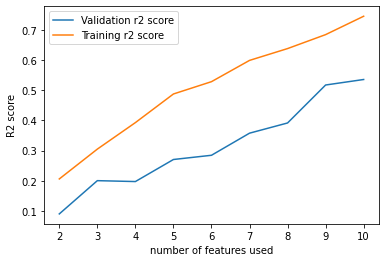

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,11):
  lst1=[]  
  LR = Lasso(max_iter=10000, alpha=0.2, fit_intercept=True)
  feature_names = np.array(X_st.columns)

  #cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
  selector = RFE(LR, n_features_to_select=x)
  selector.fit(X_st, y)
  print(f"selected features: {x}")
  selected_features = X_st.columns[selector.support_]

  for i in selected_features:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()  
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=Lasso(max_iter=10000, alpha=0.2, fit_intercept=True)
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')
  
  predicted= cross_val_predict(model, X_Train, y,
                              cv=10)
  
  scores = r2_score(y, predicted)
                              

  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error') 
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
best_trial = study.best_trial
best_params = best_trial.params
model = Lasso(alpha=best_params['alpha'],
              fit_intercept=best_params['fit_intercept'],
              max_iter=best_params['max_iter'],
              selection=best_params['selection'],
              tol=best_params['tol'])

model.fit(X_train,y)
pred_train=model.predict(X_train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_train, y,
                              cv=LeaveOneOut())  
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)

r2 score for train data in LR: 0.39768116442527834
cross validation r2 score: 0.26776802165431257


selected features: 2
selected features: 3
selected features: 4
selected features: 5
selected features: 6
selected features: 7
selected features: 8
selected features: 9
selected features: 10
Done in 19.359s
r2 score for train data in LR: 0.2814080761175498
cross validation r2 score:
0.14465778855735345
r2 score for train data in LR: 0.39768177606487953
cross validation r2 score:
0.20202471145655077
r2 score for train data in LR: 0.42050036739126107
cross validation r2 score:
0.19148728520608704
r2 score for train data in LR: 0.46228717902521554
cross validation r2 score:
0.23183830167599662
r2 score for train data in LR: 0.497671927943262
cross validation r2 score:
0.21913301061969725
r2 score for train data in LR: 0.5284303090727603
cross validation r2 score:
0.20924253206877297
r2 score for train data in LR: 0.6000908213803631
cross validation r2 score:
0.28414483410485913
r2 score for train data in LR: 0.6509738484609839
cross validation r2 score:
0.36135948664060236
r2 score for tra

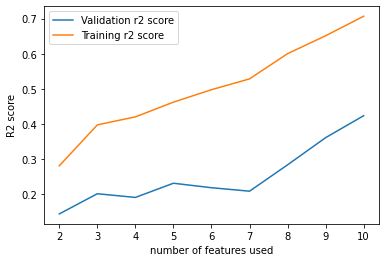

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,11):
  lst1=[]  
  Rd =Lasso(alpha=best_params['alpha'],
            fit_intercept=best_params['fit_intercept'],
            max_iter=best_params['max_iter'],
            selection=best_params['selection'],
            tol=best_params['tol'])
  feature_names = np.array(X_st.columns)

  selector = RFE(LR, n_features_to_select=x)
  selector.fit(X_st, y)
  print(f"selected features: {x}")
  selected_features = X_st.columns[selector.support_]

  for i in selected_features:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()  
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=Lasso(max_iter=10000, alpha=0.2, fit_intercept=True)
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')
  
  predicted= cross_val_predict(model, X_Train, y,
                              cv=10)
  
  scores = r2_score(y, predicted)
                              

  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error') 
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
lst2

[['gsv_fence_p250', 'gsv_road_p500'],
 ['gsv_fence_p250', 'gsv_plant_p500', 'gsv_road_p500'],
 ['gsv_plant_p250', 'gsv_fence_p250', 'gsv_plant_p500', 'gsv_road_p500'],
 ['gsv_plant_p250',
  'gsv_fence_p250',
  'gsv_plant_p500',
  'gsv_road_p500',
  'gsv_streetligh_p500'],
 ['gsv_plant_p250',
  'gsv_fence_p250',
  'gsv_plant_p500',
  'gsv_road_p500',
  'gsv_streetligh_p500',
  'RdL1_100'],
 ['gsv_house_p100',
  'gsv_plant_p250',
  'gsv_fence_p250',
  'gsv_plant_p500',
  'gsv_road_p500',
  'gsv_streetligh_p500',
  'RdL1_100'],
 ['gsv_house_p100',
  'gsv_plant_p250',
  'gsv_fence_p250',
  'gsv_plant_p500',
  'gsv_road_p500',
  'gsv_streetligh_p500',
  'gsv_truck_p1250',
  'RdL1_100'],
 ['gsv_car_p50',
  'gsv_house_p100',
  'gsv_plant_p250',
  'gsv_fence_p250',
  'gsv_plant_p500',
  'gsv_road_p500',
  'gsv_streetligh_p500',
  'gsv_truck_p1250',
  'RdL1_100'],
 ['gsv_car_p50',
  'gsv_house_p100',
  'gsv_plant_p250',
  'gsv_fence_p250',
  'gsv_plant_p500',
  'gsv_road_p500',
  'gsv_streetlig

r2 score for train data in LR: 0.2064399022457295
cross validation r2 score:
0.09071475716490063
r2 score for train data in LR: 0.3051003471831851
cross validation r2 score:
0.2006148405511612
r2 score for train data in LR: 0.392713721671048
cross validation r2 score:
0.1980826950346276
r2 score for train data in LR: 0.4873567535274316
cross validation r2 score:
0.2707680744671688
r2 score for train data in LR: 0.528072011535694
cross validation r2 score:
0.284866862483543
r2 score for train data in LR: 0.598403886674175
cross validation r2 score:
0.35759130238731507
r2 score for train data in LR: 0.6374776342647006
cross validation r2 score:
0.39155568044565225
r2 score for train data in LR: 0.6836274721195871
cross validation r2 score:
0.5172026729513283
r2 score for train data in LR: 0.7443719693688939
cross validation r2 score:
0.5388593416788735


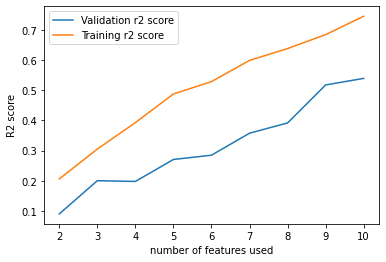

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=Lasso(alpha=best_params['alpha'],
            fit_intercept=best_params['fit_intercept'],
            max_iter=best_params['max_iter'],
            selection=best_params['selection'],
            tol=best_params['tol'])
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')
  
  predicted= cross_val_predict(model, X_Train, y,
                              cv=10)
  
  scores = r2_score(y, predicted)
                              

  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error') 
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

# **SVR**

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,11):
  lst1=[]  

  feature_names = np.array(X_st.columns)

  estimator = SVR(kernel="linear")

  selector = RFE(estimator, n_features_to_select=x)
  selector.fit(X_st, y)
  print(f"selected features: {x}")
  selected_features = X_st.columns[selector.get_support()]

  for i in selected_features:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()  
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

selected features: 2
selected features: 3
selected features: 4
selected features: 5
selected features: 6
selected features: 7
selected features: 8
selected features: 9
selected features: 10
Done in 0.815s


In [ ]:
lst2

[['RdAll_100', 'RdAll_150'],
 ['RdAll_100', 'RdAll_150', 'RdAll_250'],
 ['RdAll_100', 'RdAll_150', 'RdAll_250', 'RdL1_1500'],
 ['RdAll_100', 'RdAll_150', 'RdAll_250', 'RdL1_1500', 'RdL4_100'],
 ['RdAll_100', 'RdAll_150', 'RdAll_250', 'RdclT_100', 'RdL1_1500', 'RdL4_100'],
 ['RdAll_100',
  'RdAll_150',
  'RdAll_250',
  'RdclT_100',
  'RdL1_1500',
  'RdL4_100',
  'RdL4_150'],
 ['RdAll_100',
  'RdAll_150',
  'RdAll_250',
  'RdclT_100',
  'RdL1_1500',
  'RdL1_500',
  'RdL4_100',
  'RdL4_150'],
 ['RdAll_100',
  'RdAll_150',
  'RdAll_250',
  'RdclP_100',
  'RdclT_100',
  'RdL1_1500',
  'RdL1_500',
  'RdL4_100',
  'RdL4_150'],
 ['RdAll_100',
  'RdAll_150',
  'RdAll_250',
  'RdclP_100',
  'RdclT_100',
  'RdclT_250',
  'RdL1_1500',
  'RdL1_500',
  'RdL4_100',
  'RdL4_150']]

r2 score for train data in LR: -0.03963447443727697
cross validation r2 score:
-0.08290666843718708
r2 score for train data in LR: -0.03966495521283564
cross validation r2 score:
-0.08294838450978137
r2 score for train data in LR: -0.03960154460539944
cross validation r2 score:
-0.08283912675872385
r2 score for train data in LR: -0.03960620207805676
cross validation r2 score:
-0.08285044296874267
r2 score for train data in LR: -0.03961422297804007
cross validation r2 score:
-0.08283091950888921
r2 score for train data in LR: -0.03960897116298567
cross validation r2 score:
-0.08283178158719862
r2 score for train data in LR: -0.03961366664719357
cross validation r2 score:
-0.08283066268565675
r2 score for train data in LR: -0.03961457349019604
cross validation r2 score:
-0.08283500283302003
r2 score for train data in LR: -0.0396251941463055
cross validation r2 score:
-0.08285264529111624


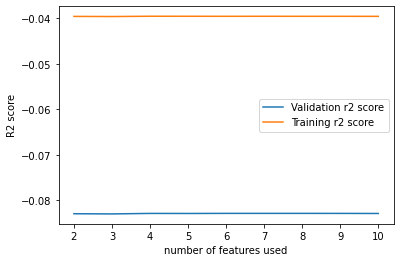

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=SVR()
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')
  
  predicted= cross_val_predict(model, X_Train, y,
                              cv=LeaveOneOut())
  
  scores = r2_score(y, predicted)
                              

  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error') 
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:

most_relevant_features=lst2[2]

X_train=X_st[most_relevant_features]  


In [ ]:
def objective(trial):
    C = int(trial.suggest_int("C", 1, 10000))
    #kernel = trial.suggest_categorical("kernel", ['rbf','linear'])
    gamma = trial.suggest_float("gamma", 0.001, 1000, log=True)    
    ## Create Model
    regressor = SVR(C=C,kernel='linear',gamma=gamma)
    regressor.fit(X_train,y)
    pred_train=regressor.predict(X_train)
    r2_per= r2_score(y, pred_train)   
    predicted= cross_val_predict(regressor, X_train, y, cv=10)
    r2 = r2_score(y, predicted)
    threshold = 0.1

    # Penalize the objective if the difference between r2 and r2_per is greater than the threshold
    if r2 > .4 and abs(r2_per-r2) < threshold:

      x = r2/ abs(r2_per-r2)

    else:
      
      x = r2

    return x

In [ ]:
study = optuna.create_study(study_name="SVR",direction='maximize')
study.optimize(objective, n_trials=1000)

[I 2023-03-25 05:56:12,866] A new study created in memory with name: SVR
[I 2023-03-25 05:56:12,936] Trial 0 finished with value: 0.002202017132038603 and parameters: {'C': 2078, 'gamma': 0.002802997200890105}. Best is trial 0 with value: 0.002202017132038603.
[I 2023-03-25 05:56:12,981] Trial 1 finished with value: 0.02425663548665602 and parameters: {'C': 318, 'gamma': 349.512391564765}. Best is trial 1 with value: 0.02425663548665602.
[I 2023-03-25 05:56:13,040] Trial 2 finished with value: -0.046318584705849375 and parameters: {'C': 8630, 'gamma': 325.0434346344252}. Best is trial 1 with value: 0.02425663548665602.
[I 2023-03-25 05:56:13,084] Trial 3 finished with value: -0.04264153934735071 and parameters: {'C': 7303, 'gamma': 0.39947200541895594}. Best is trial 1 with value: 0.02425663548665602.
[I 2023-03-25 05:56:13,139] Trial 4 finished with value: -0.04274751299322599 and parameters: {'C': 7622, 'gamma': 422.7086837510695}. Best is trial 1 with value: 0.02425663548665602.
[I 

In [ ]:
print("Best Params : {}".format(study.best_params))

print("\nBest r2 : {}".format(study.best_value))

best_trial = study.best_trial
best_params = best_trial.params
model = SVR(C=best_params['C'],
              kernel='linear',
              gamma=best_params['gamma'])

model.fit(X_train,y)
pred_train=model.predict(X_train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_train, y,
                              cv=10)  
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)

Best Params : {'C': 460, 'gamma': 158.5802506102645}

Best r2 : 0.035579710533103825
r2 score for train data in LR: 0.1336016879012304
cross validation r2 score: 0.035579710533103825


In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,11):
  lst1=[]  

  feature_names = np.array(X_st.columns)

  estimator = SVR(C=best_params['C'],
              kernel='linear',
              gamma=best_params['gamma'])

  selector = RFE(estimator, n_features_to_select=x)
  selector.fit(X_st, y)
  print(f"selected features: {x}")
  selected_features = X_st.columns[selector.get_support()]

  for i in selected_features:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()  
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

selected features: 2
selected features: 3
selected features: 4
selected features: 5
selected features: 6
selected features: 7
selected features: 8
selected features: 9
selected features: 10
Done in 2.373s


In [ ]:
lst2

[['RdL1_100', 'RdL4_150'],
 ['RdL1_100', 'RdL4_100', 'RdL4_150'],
 ['RdAll_150', 'RdL1_100', 'RdL4_100', 'RdL4_150'],
 ['land_Ar_UF_p_100', 'RdAll_150', 'RdL1_100', 'RdL4_100', 'RdL4_150'],
 ['land_Ar_UF_p_100',
  'RdAll_150',
  'RdL1_100',
  'RdL1_150',
  'RdL4_100',
  'RdL4_150'],
 ['land_Ar_UF_p_100',
  'RdAll_150',
  'RdclS_500',
  'RdL1_100',
  'RdL1_150',
  'RdL4_100',
  'RdL4_150'],
 ['land_Ar_UF_p_100',
  'RdAll_150',
  'RdclP_500',
  'RdclS_500',
  'RdL1_100',
  'RdL1_150',
  'RdL4_100',
  'RdL4_150'],
 ['land_Ar_UF_p_100',
  'RdAll_150',
  'RdAll_250',
  'RdclP_500',
  'RdclS_500',
  'RdL1_100',
  'RdL1_150',
  'RdL4_100',
  'RdL4_150'],
 ['land_Ar_UF_p_100',
  'land_Ar_MC_p_1500',
  'RdAll_150',
  'RdAll_250',
  'RdclP_500',
  'RdclS_500',
  'RdL1_100',
  'RdL1_150',
  'RdL4_100',
  'RdL4_150']]

r2 score for train data in LR: 0.3064982094491484
cross validation r2 score:
0.1989134713505818
r2 score for train data in LR: 0.2807908878103422
cross validation r2 score:
0.19773525371008405
r2 score for train data in LR: 0.3028929105666839
cross validation r2 score:
0.2446352673574561
r2 score for train data in LR: 0.3296305135687051
cross validation r2 score:
0.24017664752622248
r2 score for train data in LR: 0.32853370100521584
cross validation r2 score:
0.23993702988204102
r2 score for train data in LR: 0.35683082795396426
cross validation r2 score:
0.22426524977549833
r2 score for train data in LR: 0.3726469163648404
cross validation r2 score:
0.2690871872661289
r2 score for train data in LR: 0.36264600722300655
cross validation r2 score:
0.26863622362699513
r2 score for train data in LR: 0.3670461069847264
cross validation r2 score:
0.25308964360278163


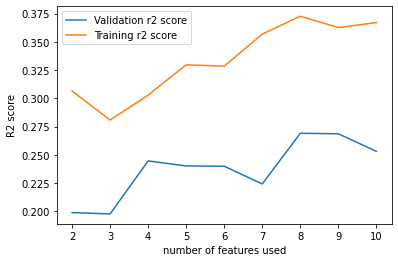

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=SVR(C=best_params['C'],
            kernel='linear',
            gamma=best_params['gamma'])
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')
  
  predicted= cross_val_predict(model, X_Train, y,
                              cv=10)
  
  scores = r2_score(y, predicted)
                              

  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error') 
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
lst2

[['RdL1_100', 'RdL4_150'],
 ['RdL1_100', 'RdL4_100', 'RdL4_150'],
 ['RdAll_150', 'RdL1_100', 'RdL4_100', 'RdL4_150'],
 ['land_Ar_UF_p_100', 'RdAll_150', 'RdL1_100', 'RdL4_100', 'RdL4_150'],
 ['land_Ar_UF_p_100',
  'RdAll_150',
  'RdL1_100',
  'RdL1_150',
  'RdL4_100',
  'RdL4_150'],
 ['land_Ar_UF_p_100',
  'RdAll_150',
  'RdclS_500',
  'RdL1_100',
  'RdL1_150',
  'RdL4_100',
  'RdL4_150'],
 ['land_Ar_UF_p_100',
  'RdAll_150',
  'RdclP_500',
  'RdclS_500',
  'RdL1_100',
  'RdL1_150',
  'RdL4_100',
  'RdL4_150'],
 ['land_Ar_UF_p_100',
  'RdAll_150',
  'RdAll_250',
  'RdclP_500',
  'RdclS_500',
  'RdL1_100',
  'RdL1_150',
  'RdL4_100',
  'RdL4_150'],
 ['land_Ar_UF_p_100',
  'land_Ar_MC_p_1500',
  'RdAll_150',
  'RdAll_250',
  'RdclP_500',
  'RdclS_500',
  'RdL1_100',
  'RdL1_150',
  'RdL4_100',
  'RdL4_150']]

In [ ]:
X_train = X_st[lst2[2]]
def objective(trial):
    C = int(trial.suggest_int("C", 1, 100000))
    #kernel = trial.suggest_categorical("kernel", ['rbf','linear'])
    gamma = trial.suggest_float("gamma", 0.001, 10000, log=True)  
    ## Create Model
    regressor = SVR(C=C,kernel='linear',gamma=gamma)
    regressor.fit(X_train,y)
    pred_train=regressor.predict(X_train)
    r2_per= r2_score(y, pred_train)   
    predicted= cross_val_predict(regressor, X_train, y, cv=10)
    r2 = r2_score(y, predicted)
    threshold = 0.1

    # Penalize the objective if the difference between r2 and r2_per is greater than the threshold
    if r2 > .4 and abs(r2_per-r2) < threshold:

      x = r2**2/ abs(r2_per-r2)

    else:
      
      x = r2

    return x

In [ ]:
study = optuna.create_study(study_name="SVR",direction='maximize')
study.optimize(objective, n_trials=500)

[I 2023-03-25 05:59:54,358] A new study created in memory with name: SVR
[I 2023-03-25 05:59:54,470] Trial 0 finished with value: -0.27040597806888234 and parameters: {'C': 73709, 'gamma': 0.007016689289231258}. Best is trial 0 with value: -0.27040597806888234.
[I 2023-03-25 05:59:54,568] Trial 1 finished with value: -0.2677138253298921 and parameters: {'C': 59010, 'gamma': 2.8607838768796796}. Best is trial 1 with value: -0.2677138253298921.
[I 2023-03-25 05:59:54,665] Trial 2 finished with value: -0.2724825192754965 and parameters: {'C': 84895, 'gamma': 1078.9136350960057}. Best is trial 1 with value: -0.2677138253298921.
[I 2023-03-25 05:59:54,751] Trial 3 finished with value: -0.27210892481123006 and parameters: {'C': 82892, 'gamma': 1.6417031104492668}. Best is trial 1 with value: -0.2677138253298921.
[I 2023-03-25 05:59:54,870] Trial 4 finished with value: -0.27459050912111826 and parameters: {'C': 36453, 'gamma': 0.05840393838590976}. Best is trial 1 with value: -0.2677138253298

In [ ]:
print("Best Params for 6 features : {}".format(study.best_params))

print("\nBest r2 : {}".format(study.best_value))

best_trial = study.best_trial
best_params = best_trial.params

model = SVR(C=best_params['C'],
              kernel='linear',
              gamma=best_params['gamma'])

model.fit(X_train,y)
pred_train=model.predict(X_train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_train, y,
                              cv=10)  
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)

Best Params for 6 features : {'C': 739, 'gamma': 118.63158417515537}

Best r2 : 0.2633011981977601
r2 score for train data in LR: 0.3090486432633338
cross validation r2 score: 0.2633011981977601


RdAll_150   -1.375870
RdL1_100    -0.211848
RdL4_100    -0.321104
RdL4_150    -0.408242
dtype: float64
RdAll_150    3.148922
RdL1_100     6.337739
RdL4_100     4.281993
RdL4_150     3.706507
dtype: float64
r2 score for train data in LR: 0.3090486432633338
cross validation r2 score: 0.2633011981977601
Minimum prediction value: 35577.24779213518
Corresponding row: prediction    35577.247792
Latitude         23.688385
Longitude        90.436188
Name: 1268, dtype: float64
Minimum prediction value: 94622.69062335588
Corresponding row: prediction    94622.690623
Latitude         23.758698
Longitude        90.374786
Name: 4822, dtype: float64
0


Weight,Feature
0.1113 ± 0.0717,RdL1_100
0.0762 ± 0.0500,RdL4_150
0.0621 ± 0.0302,RdAll_150
0.0349 ± 0.0889,RdL4_100


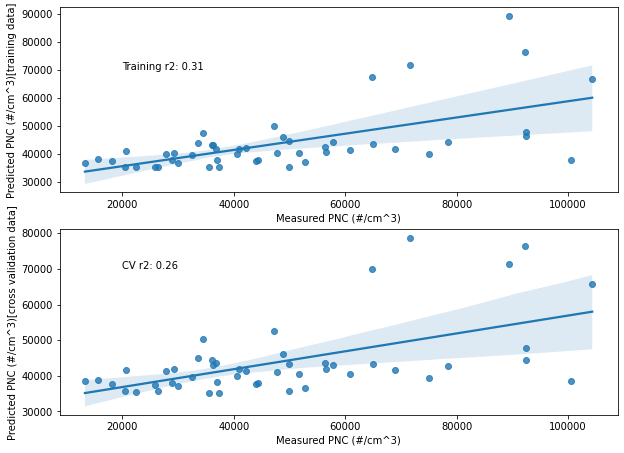

In [ ]:
lst1 = ['RdAll_150', 'RdL1_100', 'RdL4_100', 'RdL4_150']
df_relevant = X_st[lst1]
x_pred_relevant = x_pred_st[lst1] 

# For each feature, find the minimum and maximum values in the Df dataset
feature_min = df_relevant.min()
feature_max = df_relevant.max()
print(feature_min)
print(feature_max)

# Initialize a list to store the indices of rows to keep
rows_to_keep = []

# Iterate over each row in the X_Pred dataset
for i, row in x_pred_relevant.iterrows():
    # Initialize a flag to check if this row should be kept
    keep_row = True
    
    # Iterate over each feature in the row
    for feature in lst1:
        # Check if the value for this feature falls outside the range of values in the Df dataset
        if row[feature] < feature_min[feature] or row[feature] > feature_max[feature]:
            # If it does, mark this row as one to skip
            keep_row = False
            break
    
    # If the row passed the checks, append its index to the list of rows to keep
    if keep_row:
        rows_to_keep.append(i)

# Use the list of indices to select only the rows that should be kept
x_pred_filtered = x_pred_relevant.loc[rows_to_keep]



model = SVR(C=739,
              kernel='linear',
              gamma=118.63158417515537)

X_train= X_st[lst1]

model.fit(X_train,y)
pred_train=model.predict(X_train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_train, y,
                              cv=10)  
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)
new= pd.DataFrame()
new["actual"]=y
new["predicted"]= predicted
new

txt1 = "Training r2: " + str(round(r2_per,2))
txt2 = "CV r2: " + str(round(scores,2))

fig, axs = plt.subplots(2,1, figsize=(10, 7.5))

axs[0]=sns.regplot(ax=axs[0],x=y, y=pred_train)
axs[0].set_xlabel("Measured PNC (#/cm^3)")
axs[0].set_ylabel("Predicted PNC (#/cm^3)[training data]")
axs[0].text(20000, 70000,  txt1)

axs[1]=sns.regplot(ax=axs[1], x=y, y=predicted)
axs[1].set_xlabel("Measured PNC (#/cm^3)")
axs[1].set_ylabel("Predicted PNC (#/cm^3)[cross validation data]")
axs[1].text(20000, 70000,  txt2)


x_pred_new = x_pred_filtered
pred_train=model.predict(x_pred_new)
pred = pd.DataFrame(index=x_pred_new.index)
pred['prediction'] = pred_train
pred['Latitude'] = X_Pred.loc[pred.index, 'Latitude'].values
pred['Longitude'] = X_Pred.loc[pred.index, 'Longitude'].values
pred.to_csv('/content/SVR_poi.csv')

min_prediction_index = pred['prediction'].idxmin()
min_prediction_row = pred.loc[min_prediction_index]

print("Minimum prediction value:", min_prediction_row['prediction'])
print("Corresponding row:", min_prediction_row)

max_prediction_index = pred['prediction'].idxmax()
max_prediction_row = pred.loc[max_prediction_index]

print("Minimum prediction value:", max_prediction_row['prediction'])
print("Corresponding row:", max_prediction_row)

num_negatives = (pred['prediction'] <0).sum()

print(num_negatives)

perm = PermutationImportance(model).fit(X_train, y)
eli5.show_weights(perm, feature_names=X_train.columns.tolist())

# **XGBoost**

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,11):
  lst1=[]  

  feature_names = np.array(X_st.columns)

  estimator = XGBRegressor(booster='gblinear',objective= "reg:squarederror")

  selector = RFE(estimator, n_features_to_select=x)
  selector.fit(X_st, y)
  print(f"selected features: {x}")
  selected_features = X_st.columns[selector.get_support()]

  for i in selected_features:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()  
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

selected features: 2
selected features: 3
selected features: 4
selected features: 5
selected features: 6
selected features: 7
selected features: 8
selected features: 9
selected features: 10
Done in 18.840s


In [ ]:
lst2

[['land_Ar_IC_p_1500', 'RdL4_150'],
 ['RdclS_750', 'RdL1_1500', 'RdL2_1500'],
 ['RdclS_750', 'RdL1_1500', 'RdL2_1500', 'pop_750'],
 ['land_Ar_UF_p_1250', 'RdclS_750', 'RdL1_1500', 'RdL2_1500', 'pop_750'],
 ['land_Ar_UF_p_1250',
  'land_Ar_IC_p_1500',
  'RdclS_750',
  'RdL1_1500',
  'RdL2_1500',
  'pop_500'],
 ['land_Ar_UF_p_1250',
  'land_Ar_IC_p_1500',
  'RdclS_750',
  'RdL1_1500',
  'RdL2_1500',
  'RdL4_150',
  'pop_750'],
 ['land_Ar_UF_p_1250',
  'land_Ar_IC_p_1500',
  'RdclS_750',
  'RdL1_1500',
  'RdL2_1500',
  'RdL3_1000',
  'RdL4_150',
  'pop_750'],
 ['land_Ar_UF_p_1250',
  'land_Ar_IC_p_1500',
  'RdclS_750',
  'RdL1_1500',
  'RdL2_1500',
  'RdL2_250',
  'RdL3_1000',
  'RdL4_150',
  'build_750'],
 ['land_Ar_UF_p_1250',
  'land_Ar_IC_p_1500',
  'RdclS_750',
  'RdL1_1500',
  'RdL2_1500',
  'RdL2_250',
  'RdL3_1000',
  'RdL4_150',
  'pop_750',
  'distPrim']]

r2 score for train data in LR: 0.30107550891574075
cross validation r2 score:
0.1667665343535737
r2 score for train data in LR: 0.2683106083366563
cross validation r2 score:
0.10756900630390787
r2 score for train data in LR: 0.3370848107691513
cross validation r2 score:
0.13923934934605653
r2 score for train data in LR: 0.3840592763589711
cross validation r2 score:
0.18711438173922246
r2 score for train data in LR: 0.4258458199948699
cross validation r2 score:
0.20813742371896826
r2 score for train data in LR: 0.5431741496949563
cross validation r2 score:
0.29622595095007
r2 score for train data in LR: 0.6143158320804813
cross validation r2 score:
0.4063899379279139
r2 score for train data in LR: 0.6905911785325469
cross validation r2 score:
0.5310923527481932
r2 score for train data in LR: 0.7436397200970919
cross validation r2 score:
0.5105365459958531


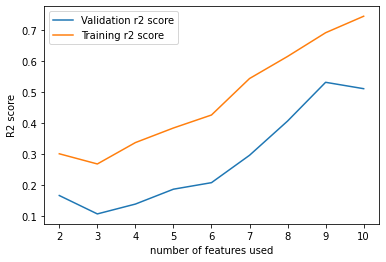

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=XGBRegressor(booster='gblinear',objective= "reg:squarederror" )
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')
  
  predicted= cross_val_predict(model, X_Train, y, cv=10)
  
  scores = r2_score(y, predicted)
                              

  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error') 
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
X_Train= X_st[lst2[5]]
#X_Train= X_st[['gsv_signboard_p250', 'gsv_house_p500', 'gsv_road_p500', 'RdL4_150']]
# X_Train= X_st[['gsv_grass_p100',
#   'gsv_fence_p1000',
#   'gsv_signboard_p1000',
#   'gsv_awning_p3000',
#   'land_Ar_p_1500',
#   'RdL4_100',
#   'RdL4_5000']]
def objective(trial):

      #gamma = trial.suggest_float('gamma', 0, 4000) 
      learning_rate= trial.suggest_float('learning_rate', .005, 2)
      #max_depth = int(trial.suggest_int('max_depth', 50, 5000)) 
      #min_child_weight= int(trial.suggest_int('min_child_weight', 0, 2000)) 
      n_estimators = int(trial.suggest_int('n_estimators', 50, 1000))
      reg_alpha= trial.suggest_float('reg_alpha', .1, 100)
      reg_lambda= trial.suggest_float('reg_lambda', .1, 3)
      #subsample= trial.suggest_float('subsample', .6, 1)
      XGB = XGBRegressor(booster='gblinear',
                         n_estimators=n_estimators, 
                        #  max_depth=max_depth,
                        #  gamma=gamma,
                         learning_rate=learning_rate,
                        #  min_child_weight=min_child_weight,
                         reg_alpha=reg_alpha,
                         reg_lambda=reg_lambda,
                        #  subsample=subsample,
                         objective= "reg:squarederror",
                         seed=42)
      
      predicted= cross_val_predict(XGB, X_Train, y,
                            cv=10)
      return r2_score(y, predicted)

study = optuna.create_study(direction='maximize',study_name = "XGB")
study.optimize(objective, n_trials=50)

[I 2023-03-25 06:31:33,470] A new study created in memory with name: XGB
[I 2023-03-25 06:31:38,866] Trial 0 finished with value: 0.15155992633001025 and parameters: {'learning_rate': 1.1157714758396422, 'n_estimators': 573, 'reg_alpha': 42.679955293708716, 'reg_lambda': 0.6412950365441943}. Best is trial 0 with value: 0.15155992633001025.
[I 2023-03-25 06:31:42,627] Trial 1 finished with value: 0.125606176501462 and parameters: {'learning_rate': 0.46965385623667566, 'n_estimators': 191, 'reg_alpha': 97.03798332929219, 'reg_lambda': 0.8967085827472968}. Best is trial 0 with value: 0.15155992633001025.
[I 2023-03-25 06:31:47,586] Trial 2 finished with value: 0.08740012655597829 and parameters: {'learning_rate': 1.1938447632087823, 'n_estimators': 931, 'reg_alpha': 23.193867827631124, 'reg_lambda': 1.5293855408822212}. Best is trial 0 with value: 0.15155992633001025.
[I 2023-03-25 06:31:53,508] Trial 3 finished with value: 0.09161835210725422 and parameters: {'learning_rate': 0.571261810

In [ ]:
study.optimize(objective, n_trials=500)

[I 2023-03-25 06:33:37,222] Trial 50 finished with value: 0.1007622290260719 and parameters: {'learning_rate': 0.8834824116350235, 'n_estimators': 949, 'reg_alpha': 10.043528732030044, 'reg_lambda': 1.293022193940137}. Best is trial 14 with value: 0.2545856741657927.
[I 2023-03-25 06:33:37,830] Trial 51 finished with value: 0.24321795989759687 and parameters: {'learning_rate': 0.753496410928937, 'n_estimators': 792, 'reg_alpha': 14.792093371939139, 'reg_lambda': 0.13069882195639734}. Best is trial 14 with value: 0.2545856741657927.
[I 2023-03-25 06:33:38,358] Trial 52 finished with value: 0.214826151590798 and parameters: {'learning_rate': 0.8160795761604478, 'n_estimators': 717, 'reg_alpha': 19.10451401617016, 'reg_lambda': 0.22963134882510294}. Best is trial 14 with value: 0.2545856741657927.
[I 2023-03-25 06:33:38,972] Trial 53 finished with value: 0.25547004779891036 and parameters: {'learning_rate': 0.6908239223923182, 'n_estimators': 860, 'reg_alpha': 7.089960322439951, 'reg_lamb

In [ ]:
best_trial = study.best_trial
best_params = best_trial.params
print(f"best parameters: {best_params}")
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,11):
  lst1=[]  

  feature_names = np.array(X_st.columns)

  estimator = XGBRegressor(booster='gblinear',
                          learning_rate=best_params['learning_rate'],
                          n_estimators=best_params['n_estimators'],
                          reg_alpha=best_params['reg_alpha'],
                          reg_lambda=best_params['reg_lambda'],
                          objective= "reg:squarederror",
                          seed=42)

  selector = RFE(estimator, n_features_to_select=x)
  selector.fit(X_st, y)
  print(f"selected features: {x}")
  selected_features = X_st.columns[selector.get_support()]

  for i in selected_features:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()  
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

best parameters: {'learning_rate': 0.6783718036989244, 'n_estimators': 566, 'reg_alpha': 0.18307665514013854, 'reg_lambda': 0.10000268548724313}
selected features: 2
selected features: 3
selected features: 4
selected features: 5
selected features: 6
selected features: 7
selected features: 8
selected features: 9
selected features: 10
Done in 45.109s


In [ ]:
lst2

[['RdL1_1500', 'RdL4_150'],
 ['RdL1_1500', 'RdL4_150', 'build_750'],
 ['land_Ar_UF_p_1250', 'RdL1_1500', 'RdL4_150', 'build_750'],
 ['land_Ar_UF_p_1250',
  'land_Ar_IC_p_1500',
  'RdL1_1500',
  'RdL4_150',
  'build_750'],
 ['land_Ar_UF_p_1250',
  'land_Ar_IC_p_1500',
  'RdL1_1500',
  'RdL3_750',
  'RdL4_150',
  'build_750'],
 ['land_Ar_UF_p_1250',
  'land_Ar_IC_p_1500',
  'RdL1_1500',
  'RdL3_750',
  'RdL4_150',
  'build_750',
  'distPrim'],
 ['land_Ar_UF_p_1250',
  'land_Ar_IC_p_1500',
  'RdL1_1500',
  'RdL2_100',
  'RdL3_750',
  'RdL4_150',
  'build_750',
  'distPrim'],
 ['land_Ar_UF_p_1250',
  'land_Ar_IC_p_1500',
  'RdL1_1500',
  'RdL2_100',
  'RdL2_1500',
  'RdL3_750',
  'RdL4_150',
  'build_750',
  'distPrim'],
 ['land_Ar_UF_p_1250',
  'land_Ar_IC_p_1500',
  'RdL1_1500',
  'RdL2_100',
  'RdL2_1500',
  'RdL3_750',
  'RdL4_150',
  'rest_s500',
  'build_750',
  'distPrim']]

r2 score for train data in LR: 0.3191080155957504
cross validation r2 score:
0.21136951371242385
r2 score for train data in LR: 0.3641260526568938
cross validation r2 score:
0.20272122790695868
r2 score for train data in LR: 0.3690226293302534
cross validation r2 score:
0.1692577198646652
r2 score for train data in LR: 0.4057757897441461
cross validation r2 score:
0.21291770057579973
r2 score for train data in LR: 0.49397320665058075
cross validation r2 score:
0.25073001783005744
r2 score for train data in LR: 0.5548772484826044
cross validation r2 score:
0.24589319263076348
r2 score for train data in LR: 0.6122316766193534
cross validation r2 score:
0.3211605397949049
r2 score for train data in LR: 0.6614890052213285
cross validation r2 score:
0.3869744554029608
r2 score for train data in LR: 0.6815269386078853
cross validation r2 score:
0.39878652232312706


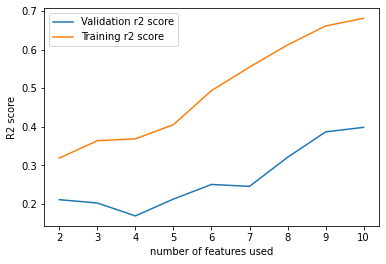

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=XGBRegressor(booster='gblinear',
                          learning_rate=best_params['learning_rate'],
                          n_estimators=best_params['n_estimators'],
                          reg_alpha=best_params['reg_alpha'],
                          reg_lambda=best_params['reg_lambda'],
                          objective= "reg:squarederror",
                          seed=42)
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')
  
  predicted= cross_val_predict(model, X_Train, y,
                              cv=10)
  
  scores = r2_score(y, predicted)
                              

  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error') 
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
X_Train= X_st[lst2[1]]
#X_Train= X_st[['gsv_signboard_p250', 'gsv_house_p500', 'gsv_road_p500', 'RdL4_150']]
# X_Train= X_st[['gsv_grass_p100',
#   'gsv_fence_p1000',
#   'gsv_signboard_p1000',
#   'gsv_awning_p3000',
#   'land_Ar_p_1500',
#   'RdL4_100',
#   'RdL4_5000']]
def objective(trial):

      #gamma = trial.suggest_float('gamma', 0, 4000) 
      learning_rate= trial.suggest_float('learning_rate', .005, 1.5)
      #max_depth = int(trial.suggest_int('max_depth', 50, 5000)) 
      #min_child_weight= int(trial.suggest_int('min_child_weight', 0, 2000)) 
      n_estimators = int(trial.suggest_int('n_estimators', 50, 1000))
      reg_alpha= trial.suggest_float('reg_alpha', .1, 100)
      reg_lambda= trial.suggest_float('reg_lambda', .1, 3)
      #subsample= trial.suggest_float('subsample', .6, 1)
      XGB = XGBRegressor(booster='gblinear',
                         n_estimators=n_estimators, 
                        #  max_depth=max_depth,
                        #  gamma=gamma,
                         learning_rate=learning_rate,
                        #  min_child_weight=min_child_weight,
                         reg_alpha=reg_alpha,
                         reg_lambda=reg_lambda,
                        #  subsample=subsample,
                         objective= "reg:squarederror",
                         seed=42)
      
      XGB.fit(X_train,y)
      pred_train=XGB.predict(X_train)
      r2_per= r2_score(y, pred_train)   
      predicted= cross_val_predict(XGB, X_train, y, cv=10)
      r2 = r2_score(y, predicted)
      threshold = 0.05

      # Penalize the objective if the difference between r2 and r2_per is greater than the threshold
      if r2 > .2 and abs(r2_per-r2) < threshold:

        x = r2*10

      else:
        
        x = r2

      return x
study = optuna.create_study(direction='maximize',study_name = "XGB")
study.optimize(objective, n_trials=500)

[I 2023-03-25 07:34:54,129] A new study created in memory with name: XGB
[I 2023-03-25 07:34:59,213] Trial 0 finished with value: 0.15964348730408573 and parameters: {'learning_rate': 1.3199718940033476, 'n_estimators': 571, 'reg_alpha': 17.32378982651374, 'reg_lambda': 2.882722888378924}. Best is trial 0 with value: 0.15964348730408573.
[I 2023-03-25 07:35:03,139] Trial 1 finished with value: 0.16982605925927696 and parameters: {'learning_rate': 0.6822589234127007, 'n_estimators': 552, 'reg_alpha': 63.24115248543217, 'reg_lambda': 2.585129945852935}. Best is trial 1 with value: 0.16982605925927696.
[I 2023-03-25 07:35:13,047] Trial 2 finished with value: 0.1782844681445208 and parameters: {'learning_rate': 0.5967343766822165, 'n_estimators': 899, 'reg_alpha': 19.208938990195136, 'reg_lambda': 2.39926843577249}. Best is trial 2 with value: 0.1782844681445208.
[I 2023-03-25 07:35:17,369] Trial 3 finished with value: 0.25952709093369697 and parameters: {'learning_rate': 1.323148143058337

In [ ]:
best_trial = study.best_trial
best_params = best_trial.params
print(f"best parameters: {best_params}")
model = XGBRegressor(booster='gblinear',
                     #gamma=best_params['gamma'],
                     learning_rate=best_params['learning_rate'],
                     #max_depth=best_params['max_depth'],
                     #min_child_weight=best_params['min_child_weight'],
                     n_estimators=best_params['n_estimators'],
                     reg_alpha=best_params['reg_alpha'],
                     reg_lambda=best_params['reg_lambda'],
                     #subsample=best_params['subsample'],
                     objective= "reg:squarederror",
                     seed=42)
model.fit(X_Train,y)
pred_train=model.predict(X_Train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_Train, y, cv=10)  
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)
new= pd.DataFrame()
new["actual"]=y
new["predicted"]= predicted
new

best parameters: {'learning_rate': 0.025797541899986842, 'n_estimators': 230, 'reg_alpha': 7.669920891452083, 'reg_lambda': 0.4930829262171275}
r2 score for train data in LR: 0.32650375354527894
cross validation r2 score: 0.20025875913404334


,actual,predicted
site_name,,
Agashadek_road,44382.44336,59246.144531
Lalbag,44037.05208,49482.445312
Gulisthan,48823.68550,53488.484375
Polashi,28827.01283,43912.343750
BUET,18134.49600,44916.726562
Azimpur,35577.14779,41488.777344
"Z Hq Hall, DU",52691.26221,39475.679688
New_market,42245.24506,41241.742188
Bolaka Cinema Hall,57820.44803,40909.640625


best parameters: {'learning_rate': 0.025797541899986842, 'n_estimators': 230, 'reg_alpha': 7.669920891452083, 'reg_lambda': 0.4930829262171275}
selected features: 2
selected features: 3
selected features: 4
selected features: 5
selected features: 6
selected features: 7
selected features: 8
selected features: 9
selected features: 10
Done in 42.863s
r2 score for train data in LR: 0.3175043892003099
cross validation r2 score:
0.24263375652294517
r2 score for train data in LR: 0.3788320142456114
cross validation r2 score:
0.2938234731765985
r2 score for train data in LR: 0.4066491065393997
cross validation r2 score:
0.26058948664194503
r2 score for train data in LR: 0.45421769919696975
cross validation r2 score:
0.2901165690437756
r2 score for train data in LR: 0.47201999361581204
cross validation r2 score:
0.27321307946261864
r2 score for train data in LR: 0.498835933980461
cross validation r2 score:
0.28099563609077516
r2 score for train data in LR: 0.5063184750055529
cross validation r2

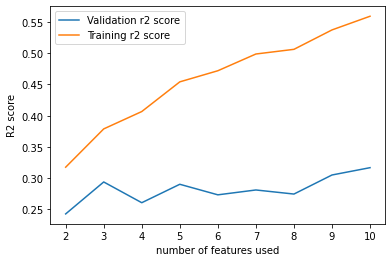

In [ ]:
best_trial = study.best_trial
best_params = best_trial.params
print(f"best parameters: {best_params}")
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,11):
  lst1=[]  

  feature_names = np.array(X_st.columns)

  estimator = XGBRegressor(booster='gblinear',
                          learning_rate=best_params['learning_rate'],
                          n_estimators=best_params['n_estimators'],
                          reg_alpha=best_params['reg_alpha'],
                          reg_lambda=best_params['reg_lambda'],
                          objective= "reg:squarederror",
                          seed=42)

  selector = RFE(estimator, n_features_to_select=x)
  selector.fit(X_st, y)
  print(f"selected features: {x}")
  selected_features = X_st.columns[selector.get_support()]

  for i in selected_features:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()  
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=XGBRegressor(booster='gblinear',
                          learning_rate=best_params['learning_rate'],
                          n_estimators=best_params['n_estimators'],
                          reg_alpha=best_params['reg_alpha'],
                          reg_lambda=best_params['reg_lambda'],
                          objective= "reg:squarederror",
                          seed=42)
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')
  
  predicted= cross_val_predict(model, X_Train, y,
                              cv=10)
  
  scores = r2_score(y, predicted)
                              

  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error') 
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
lst2

[['RdL1_100', 'RdL4_150'],
 ['RdL1_100', 'RdL2_100', 'RdL4_150'],
 ['RdL1_100', 'RdL2_100', 'RdL4_150', 'distPrim'],
 ['RdL1_100', 'RdL2_100', 'RdL3_750', 'RdL4_150', 'distPrim'],
 ['RdL1_100', 'RdL1_1500', 'RdL2_100', 'RdL3_750', 'RdL4_150', 'distPrim'],
 ['land_Ar_IC_p_1500',
  'RdL1_100',
  'RdL1_1500',
  'RdL2_100',
  'RdL3_750',
  'RdL4_150',
  'distPrim'],
 ['land_Ar_IC_p_1500',
  'RdAll_150',
  'RdL1_100',
  'RdL1_1500',
  'RdL2_100',
  'RdL3_750',
  'RdL4_150',
  'distPrim'],
 ['land_Ar_IC_p_1500',
  'RdAll_150',
  'RdL1_100',
  'RdL1_1500',
  'RdL2_100',
  'RdL3_750',
  'RdL4_150',
  'rest_s1000',
  'distPrim'],
 ['land_Ar_UF_p_100',
  'land_Ar_IC_p_1500',
  'RdAll_150',
  'RdL1_100',
  'RdL1_1500',
  'RdL2_100',
  'RdL3_750',
  'RdL4_150',
  'rest_s1000',
  'distPrim']]

In [ ]:
X_Train= X_st[lst2[1]]
#X_Train= X_st[['gsv_signboard_p250', 'gsv_house_p500', 'gsv_road_p500', 'RdL4_150']]
# X_Train= X_st[['gsv_grass_p100',
#   'gsv_fence_p1000',
#   'gsv_signboard_p1000',
#   'gsv_awning_p3000',
#   'land_Ar_p_1500',
#   'RdL4_100',
#   'RdL4_5000']]
def objective(trial):

      #gamma = trial.suggest_float('gamma', 0, 4000) 
      learning_rate= trial.suggest_float('learning_rate', .005, 1.5)
      #max_depth = int(trial.suggest_int('max_depth', 50, 5000)) 
      #min_child_weight= int(trial.suggest_int('min_child_weight', 0, 2000)) 
      n_estimators = int(trial.suggest_int('n_estimators', 50, 1000))
      reg_alpha= trial.suggest_float('reg_alpha', .1, 100)
      reg_lambda= trial.suggest_float('reg_lambda', .1, 3)
      #subsample= trial.suggest_float('subsample', .6, 1)
      XGB = XGBRegressor(booster='gblinear',
                         n_estimators=n_estimators, 
                        #  max_depth=max_depth,
                        #  gamma=gamma,
                         learning_rate=learning_rate,
                        #  min_child_weight=min_child_weight,
                         reg_alpha=reg_alpha,
                         reg_lambda=reg_lambda,
                        #  subsample=subsample,
                         objective= "reg:squarederror",
                         seed=42)
      
      XGB.fit(X_train,y)
      pred_train=XGB.predict(X_train)
      r2_per= r2_score(y, pred_train)   
      predicted= cross_val_predict(XGB, X_train, y, cv=10)
      r2 = r2_score(y, predicted)
      threshold = 0.05

      # Penalize the objective if the difference between r2 and r2_per is greater than the threshold
      if r2 > .3 and abs(r2_per-r2) < threshold:

        x = r2*10

      else:
        
        x = r2

      return x
study = optuna.create_study(direction='maximize',study_name = "XGB")
study.optimize(objective, n_trials=500)

[I 2023-03-25 08:23:08,941] A new study created in memory with name: XGB
[I 2023-03-25 08:23:12,236] Trial 0 finished with value: 0.186967822933912 and parameters: {'learning_rate': 0.2672207460000998, 'n_estimators': 311, 'reg_alpha': 8.143264125569477, 'reg_lambda': 2.199961695951657}. Best is trial 0 with value: 0.186967822933912.
[I 2023-03-25 08:23:19,704] Trial 1 finished with value: 0.24660897968256545 and parameters: {'learning_rate': 1.0758072631549767, 'n_estimators': 683, 'reg_alpha': 3.383754148221478, 'reg_lambda': 0.9618687824120578}. Best is trial 1 with value: 0.24660897968256545.
[I 2023-03-25 08:23:26,157] Trial 2 finished with value: 0.19130332849489406 and parameters: {'learning_rate': 0.19026553000782645, 'n_estimators': 978, 'reg_alpha': 24.291507163143052, 'reg_lambda': 0.12184979611879193}. Best is trial 1 with value: 0.24660897968256545.
[I 2023-03-25 08:23:30,059] Trial 3 finished with value: 0.25253705890177525 and parameters: {'learning_rate': 1.034461344491

In [ ]:
best_trial = study.best_trial
best_params = best_trial.params
print(f"best parameters: {best_params}")
model = XGBRegressor(booster='gblinear',
                     #gamma=best_params['gamma'],
                     learning_rate=best_params['learning_rate'],
                     #max_depth=best_params['max_depth'],
                     #min_child_weight=best_params['min_child_weight'],
                     n_estimators=best_params['n_estimators'],
                     reg_alpha=best_params['reg_alpha'],
                     reg_lambda=best_params['reg_lambda'],
                     #subsample=best_params['subsample'],
                     objective= "reg:squarederror",
                     seed=42)
model.fit(X_Train,y)
pred_train=model.predict(X_Train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_Train, y, cv=10)  
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)
new= pd.DataFrame()
new["actual"]=y
new["predicted"]= predicted
new

best parameters: {'learning_rate': 0.03493702786973919, 'n_estimators': 121, 'reg_alpha': 2.5562883579383366, 'reg_lambda': 0.4067387223547076}
r2 score for train data in LR: 0.3865040644740054
cross validation r2 score: 0.3009121265279744


,actual,predicted
site_name,,
Agashadek_road,44382.44336,41282.261719
Lalbag,44037.05208,41282.261719
Gulisthan,48823.68550,60439.480469
Polashi,28827.01283,48975.039062
BUET,18134.49600,45682.710938
Azimpur,35577.14779,40057.589844
"Z Hq Hall, DU",52691.26221,40057.589844
New_market,42245.24506,40057.589844
Bolaka Cinema Hall,57820.44803,44705.343750


RdL1_100   -0.211848
RdL2_100   -0.673532
RdL4_150   -0.408242
dtype: float64
RdL1_100    6.337739
RdL2_100    3.118587
RdL4_150    3.706507
dtype: float64
r2 score for train data in LR: 0.38650271898079647
cross validation r2 score: 0.3009124668990205
Minimum prediction value: 40871.15234375
Corresponding row: prediction    40871.152344
Latitude         23.688385
Longitude        90.436188
Name: 1268, dtype: float64
Minimum prediction value: 97533.875
Corresponding row: prediction    97533.875000
Latitude         23.758698
Longitude        90.374786
Name: 4822, dtype: float64
0


Weight,Feature
0.3707 ± 0.2633,RdL4_150
0.1211 ± 0.1286,RdL1_100
0.0694 ± 0.0838,RdL2_100


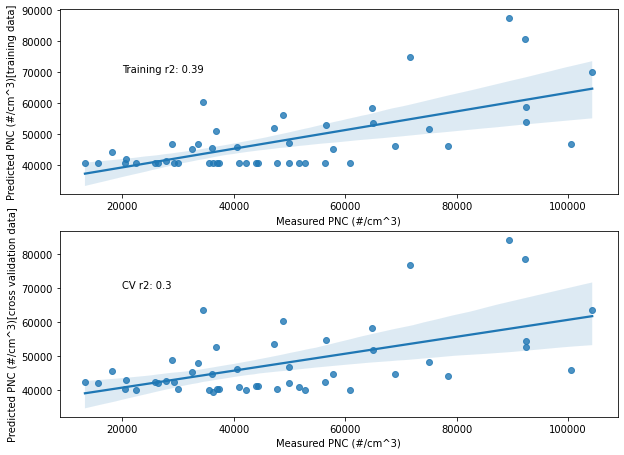

In [ ]:
lst1 = ['RdL1_100', 'RdL2_100', 'RdL4_150']
df_relevant = X_st[lst1]
x_pred_relevant = x_pred_st[lst1] 

# For each feature, find the minimum and maximum values in the Df dataset
feature_min = df_relevant.min()
feature_max = df_relevant.max()
print(feature_min)
print(feature_max)

# Initialize a list to store the indices of rows to keep
rows_to_keep = []

# Iterate over each row in the X_Pred dataset
for i, row in x_pred_relevant.iterrows():
    # Initialize a flag to check if this row should be kept
    keep_row = True
    
    # Iterate over each feature in the row
    for feature in lst1:
        # Check if the value for this feature falls outside the range of values in the Df dataset
        if row[feature] < feature_min[feature] or row[feature] > feature_max[feature]:
            # If it does, mark this row as one to skip
            keep_row = False
            break
    
    # If the row passed the checks, append its index to the list of rows to keep
    if keep_row:
        rows_to_keep.append(i)

# Use the list of indices to select only the rows that should be kept
x_pred_filtered = x_pred_relevant.loc[rows_to_keep]



model = XGBRegressor(booster='gblinear',
                     #gamma=best_params['gamma'],
                     learning_rate=0.03493702786973919,
                     #max_depth=best_params['max_depth'],
                     #min_child_weight=best_params['min_child_weight'],
                     n_estimators=121,
                     reg_alpha=2.5562883579383366,
                     reg_lambda=0.4067387223547076,
                     #subsample=best_params['subsample'],
                     objective= "reg:squarederror",
                     seed=42)

X_train= X_st[lst1]

model.fit(X_train,y)
pred_train=model.predict(X_train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_train, y,
                              cv=10)  
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)
new= pd.DataFrame()
new["actual"]=y
new["predicted"]= predicted
new

txt1 = "Training r2: " + str(round(r2_per,2))
txt2 = "CV r2: " + str(round(scores,2))

fig, axs = plt.subplots(2,1, figsize=(10, 7.5))

axs[0]=sns.regplot(ax=axs[0],x=y, y=pred_train)
axs[0].set_xlabel("Measured PNC (#/cm^3)")
axs[0].set_ylabel("Predicted PNC (#/cm^3)[training data]")
axs[0].text(20000, 70000,  txt1)

axs[1]=sns.regplot(ax=axs[1], x=y, y=predicted)
axs[1].set_xlabel("Measured PNC (#/cm^3)")
axs[1].set_ylabel("Predicted PNC (#/cm^3)[cross validation data]")
axs[1].text(20000, 70000,  txt2)


x_pred_new = x_pred_filtered
pred_train=model.predict(x_pred_new)
pred = pd.DataFrame(index=x_pred_new.index)
pred['prediction'] = pred_train
pred['Latitude'] = X_Pred.loc[pred.index, 'Latitude'].values
pred['Longitude'] = X_Pred.loc[pred.index, 'Longitude'].values
pred.to_csv('/content/xgb_poi.csv')

min_prediction_index = pred['prediction'].idxmin()
min_prediction_row = pred.loc[min_prediction_index]

print("Minimum prediction value:", min_prediction_row['prediction'])
print("Corresponding row:", min_prediction_row)

max_prediction_index = pred['prediction'].idxmax()
max_prediction_row = pred.loc[max_prediction_index]

print("Minimum prediction value:", max_prediction_row['prediction'])
print("Corresponding row:", max_prediction_row)

num_negatives = (pred['prediction'] <0).sum()

print(num_negatives)

perm = PermutationImportance(model).fit(X_train, y)
eli5.show_weights(perm, feature_names=X_train.columns.tolist())